# Time Series Forecasting 


### Notebook Content

### Time Series Forecasting

1. Time Series
2. Time Series Plot

### Time Series
<br>A time series is usually modelled through a stochastic process Y(t), i.e. a sequence of random variables. In a forecasting setting we find ourselves at time t and we are interested in estimating Y(t+h), using only information available at time t.

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


from datetime import date as dt
from datetime import datetime,timedelta

In [76]:
#Importing data
"""
About Data
The Data contain hourly count data for the last 4 years how many people used JetRail 
"""

df = pd.read_csv('dataset/train_timeseries.csv',nrows = 11856)
#Printing head
df.head()   


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [69]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
df = pd.read_csv('dataset/train_timeseries.csv', nrows = 11856)

#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df[0:10392] 
test=df[10392:]

In [70]:
#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


### Plotting data

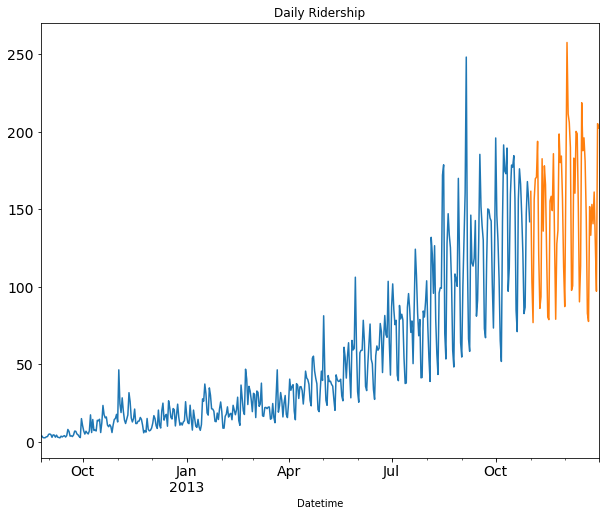

In [71]:
#Plotting data
train.Count.plot(figsize=(10,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(10,8), title= 'Daily Ridership', fontsize=14)
plt.show()